In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GomokuTools2 import GomokuTools, NH9x9, Heuristics
from GomokuBoard import GomokuBoard

---
# The Gomoku Board

In [3]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19

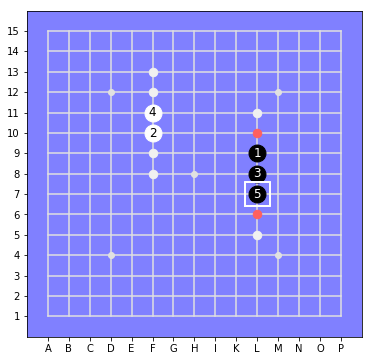

In [4]:
board=GomokuBoard(15, 6)
board.set(11,9).set(6,10).set(11,8).set(6,11).set(11,7)
board.display()

In [24]:
nh = board.getn9x9(11,10)
c_n = board.heuristics.classify_nh(nh)
sv = board.heuristics.soft_values(nh)
nh, c_n, sv

(|                 |
 |                 |
 |                 |
 |                 |
 |        *        |
 |        x        |
 |        x        |
 |        x        |
 |                 |, [(7, 0, 3), (0, 0, 6)], [14088, 0])

---
### Visualizing threats and opportunities

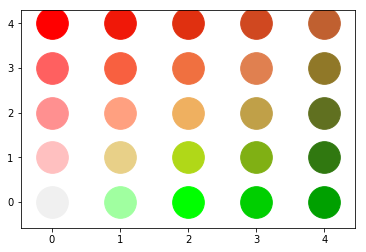

In [6]:
for d in range(4, -1, -1):
    for o in range(5):
        plt.scatter([o], [d], color=board.color_scheme[o][d], s=1000)

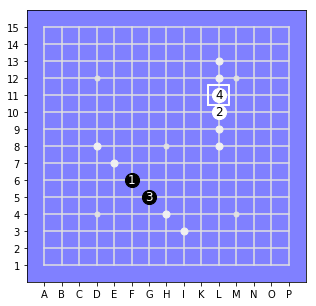

In [7]:
board = GomokuBoard(15, 5, [(F,6), (L,10), (G,5), (L,11)])
board.display(score='current');

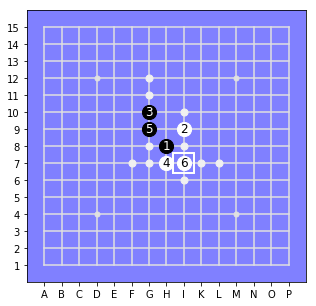

In [8]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display(score='current');

The board chooses the color automatically.

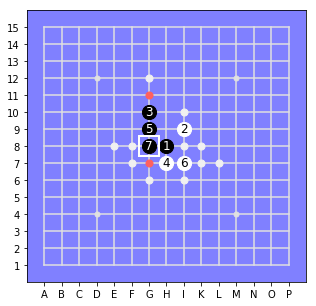

In [9]:
board.set(G,8)
board.display()

Undo the last move:

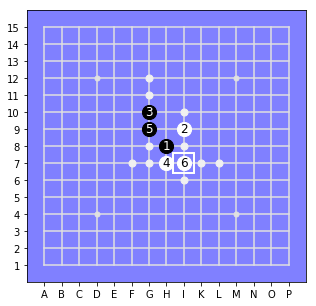

In [10]:
board.undo()
board.display()

---
Winding the game forward and backward.

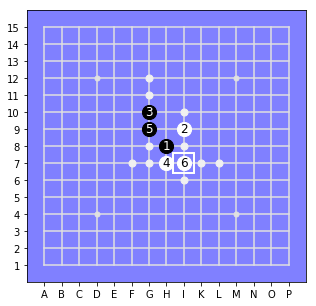

In [11]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display()

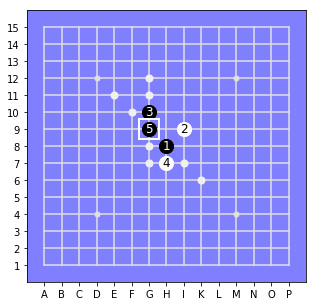

In [12]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.bwd()
board.display()

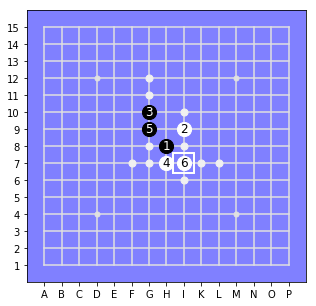

In [13]:
board.fwd()
board.display()

In [14]:
game = pd.read_csv('3_11_3_2.psq', header=None)
# originally 20x20 data, but fits on a 15x15, if we shift it a bit to the left
game = game - [5,0] 

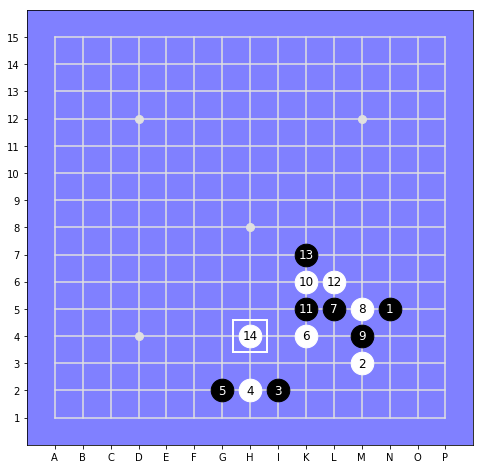

In [15]:
stones = game.values.tolist()
board = GomokuBoard(15, 8, stones)
board.bwd(20).display(score=None)

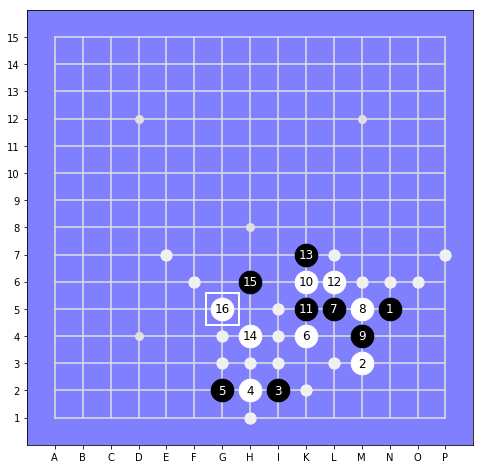

In [16]:
board.fwd(2).display();

Once implemented, stats would look like...
```
n = (board.cursor+1)
data = pd.DataFrame(board.stats[1])
figure, axes = plt.subplots(1,2, figsize=(10, 4))
axes[0].plot(range(4, n+2, 2), data['max_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['max_d'][2:n//2+1], 'r' );
axes[1].plot(range(4, n+2, 2), data['avg_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['avg_d'][2:n//2+1], 'r' );
```